In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.patches import Polygon

datdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/cty_lst_/gpw4'
loadpath = f"{datdir}/downtown_sorted.txt"
df_loaded = pd.read_csv(loadpath, sep=',', header=None)
df_loaded.columns = df_loaded.iloc[0]
df_loaded = df_loaded[1:].reset_index(drop=True)
col_lst = ['wup', 'population', 'water availability', 'MPCY', 'potential']
for col in col_lst:
    df_loaded[col] = pd.to_numeric(df_loaded[col], errors='coerce')
df_loaded.head(10)

,city_num,city_name,scarcity,wup,population,water availability,MPCY,potential,region,country
0,1,Tokyo,●,37.0,32.0,14.000,450.0,-18.0,eastern asia,Japan
1,2,Delhi,●,22.0,22.0,4.400,200.0,-18.0,southern asia,India
2,4,Ciudad de México (Mexico City),●,20.0,20.0,0.300,15.0,-20.0,central america,Mexico
3,9,Al-Qahirah (Cairo),○,17.0,17.0,710.000,42000.0,690.0,northern africa,Egypt
4,11,Dhaka,●,15.0,15.0,0.096,6.4,-15.0,southern asia,Bangladesh
5,3,Shanghai,○,20.0,15.0,16.000,1100.0,1.9,eastern asia,China
6,13,Kolkata (Calcutta),○,14.0,14.0,32.000,2200.0,17.0,southern asia,India
7,8,Mumbai (Bombay),●,18.0,14.0,9.300,650.0,-5.0,southern asia,India
8,10,Beijing,●,16.0,14.0,2.400,170.0,-11.0,eastern asia,China
9,12,Buenos Aires,●,14.0,13.0,0.700,53.0,-13.0,south america,Argentina


In [6]:
region_counts = df_loaded['region'].value_counts()
wup_sum = df_loaded.groupby('region')['wup'].sum()
summary = pd.DataFrame({
    'Count': region_counts,
    'WUP Total Population': wup_sum
})
sorted_summary = summary.sort_values(by='WUP Total Population', ascending=False)
print(sorted_summary)
total_population_2010 =df_loaded['wup'].sum()
print(f"全都市の合計人口 (million person): {total_population_2010}")

                    Count  WUP Total Population
eastern asia          457                569.34
southern asia         197                276.10
northern america      161                204.79
south america         106                177.53
western asia           69                101.71
south-eastern asia     71                 97.94
eastern europe        101                 81.85
central america        57                 72.82
western africa         63                 59.61
eastern africa         47                 51.58
western europe         58                 51.39
southern europe        52                 51.36
northern africa        28                 46.05
northern europe        37                 35.02
middle africa          18                 28.05
oceania                15                 17.62
caribbean               9                 11.75
central asia            7                  6.47
全都市の合計人口 (million person): 1940.9799999999998


In [9]:
shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

values = list(df['Region'].unique())

for country in countries:
    country_name = country.attributes['NAME']
    print(country_name) 

Fiji
Tanzania
W. Sahara
Canada
United States of America
Kazakhstan
Uzbekistan
Papua New Guinea
Indonesia
Argentina
Chile
Dem. Rep. Congo
Somalia
Kenya
Sudan
Chad
Haiti
Dominican Rep.
Russia
Bahamas
Falkland Is.
Norway
Greenland
Fr. S. Antarctic Lands
Timor-Leste
South Africa
Lesotho
Mexico
Uruguay
Brazil
Bolivia
Peru
Colombia
Panama
Costa Rica
Nicaragua
Honduras
El Salvador
Guatemala
Belize
Venezuela
Guyana
Suriname
France
Ecuador
Puerto Rico
Jamaica
Cuba
Zimbabwe
Botswana
Namibia
Senegal
Mali
Mauritania
Benin
Niger
Nigeria
Cameroon
Togo
Ghana
Côte d'Ivoire
Guinea
Guinea-Bissau
Liberia
Sierra Leone
Burkina Faso
Central African Rep.
Congo
Gabon
Eq. Guinea
Zambia
Malawi
Mozambique
eSwatini
Angola
Burundi
Israel
Lebanon
Madagascar
Palestine
Gambia
Tunisia
Algeria
Jordan
United Arab Emirates
Qatar
Kuwait
Iraq
Oman
Vanuatu
Cambodia
Thailand
Laos
Myanmar
Vietnam
North Korea
South Korea
Mongolia
India
Bangladesh
Bhutan
Nepal
Pakistan
Afghanistan
Tajikistan
Kyrgyzstan
Turkmenistan
Iran
Syria
A

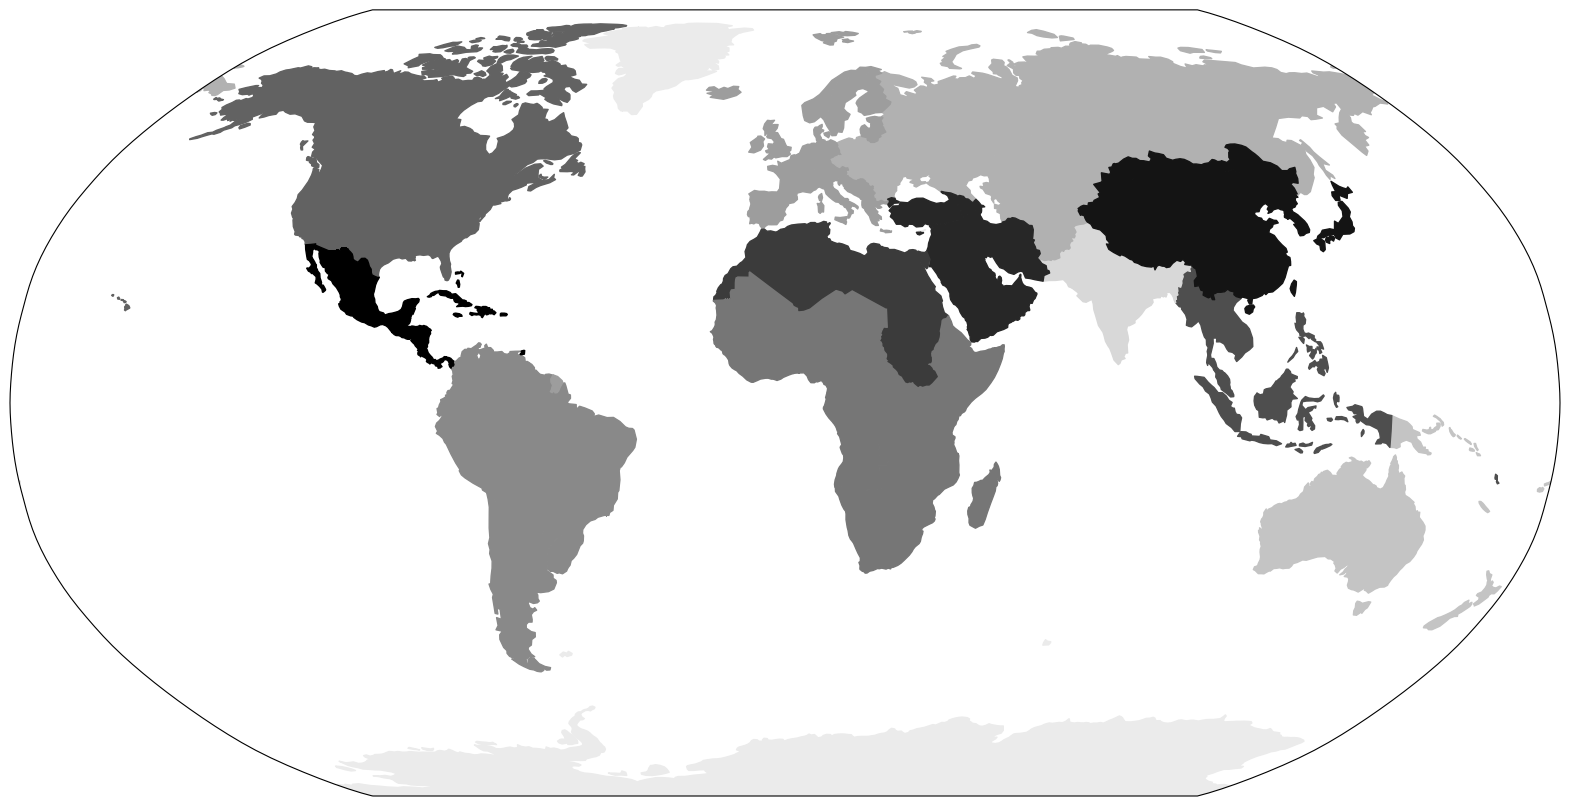

In [13]:
def plot_countries(df, projection, colors):
    plt.figure(figsize=(20, 20))
    ax = plt.axes(projection=projection)
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    #for spine in ax.spines.values():
    #    spine.set_edgecolor(edgecolor)

    shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    values = list(df['Region'].unique())

    for country in countries:
        country_name = country.attributes['NAME']
        if country_name in df['Country'].values:
            region = df[df['Country'] == country_name]['Region'].values[0]
            color = colors[values.index(region)]
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor=color, linewidth=1)

    # legend
    #import matplotlib.patches as mpatches
    #handles = []
    #for i, value in enumerate(values):
    #    handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i]))
    #plt.legend(handles, values, loc='lower left', bbox_to_anchor=(0.025, -0.0), fancybox=True, frameon=False, fontsize=5)

    # annotate
    #ax.annotate(annotation, xy=(0, 0), xycoords='figure fraction', xytext=(0.0275, -0.025), textcoords='axes fraction',
    #            horizontalalignment='left', verticalalignment='center', fontsize=4)
    #plt.title(title, fontsize=8)
    plt.show()
    
region_mapping = {
    'central america': ['Mexico', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Haiti', 'Dominican Rep.', 'Bahamas', 'Puerto Rico', 'Jamaica', 'Cuba', 'Trinidad and Tobago'],
    'eastern asia': ['North Korea', 'South Korea', 'Mongolia', 'China', 'Taiwan', 'Japan'],
    'middle east': ['Israel', 'Lebanon', 'Palestine', 'Jordan', 'United Arab Emirates', 'Qatar', 'Kuwait', 'Iraq', 'Oman', 'Saudi Arabia', 'Yemen', 'Syria', 'Armenia', 'Turkey', 'Azerbaijan', 'Georgia', 'Cyprus', 'Iran'],
    'northern africa': ['W. Sahara', 'Tunisia', 'Algeria', 'Morocco', 'Egypt', 'Libya', 'Sudan', 'S. Sudan'],
    'south-eastern asia': ['Timor-Leste', 'Vanuatu', 'Cambodia', 'Thailand', 'Laos', 'Myanmar', 'Vietnam', 'Philippines', 'Malaysia', 'Brunei', 'Indonesia'],
    'northern america': ['Canada', 'United States of America'],
    'south africa': ['Dem. Rep. Congo', 'Central African Rep.', 'Congo', 'Gabon', 'Eq. Guinea', 'Chad', 'Tanzania', 'Somalia', 'Kenya', 'Madagascar', 'Djibouti', 'Somaliland', 'Uganda', 'Rwanda', 'Burundi', 'Ethiopia', 'Eritrea', 'Zimbabwe', 'Botswana', 'Namibia', 'Zambia', 'Malawi', 'Mozambique', 'eSwatini', 'Angola', 'South Africa', 'Lesotho', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso', 'Gambia'],
    'south america': ['Argentina', 'Chile', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Venezuela', 'Guyana', 'Suriname', 'Ecuador', 'Paraguay'],
    'western europe': ['Norway', 'Sweden', 'Iceland', 'Ireland', 'United Kingdom', 'Lithuania', 'Latvia', 'Estonia', 'Denmark', 'France', 'Belgium', 'Luxembourg', 'Netherlands', 'Germany', 'Switzerland', 'Finland', 'Portugal', 'Spain', 'Italy', 'Greece', 'Albania', 'Croatia', 'Bosnia and Herz.', 'North Macedonia', 'Serbia', 'Montenegro', 'Kosovo','Austria', 'Slovenia'],
    'eastern europe & central asia': ['Kazakhstan', 'Uzbekistan', 'Afghanistan', 'Tajikistan', 'Kyrgyzstan', 'Turkmenistan', 'Belarus', 'Ukraine', 'Poland',  'Hungary', 'Moldova', 'Romania', 'Bulgaria',  'Czechia', 'Slovakia', 'Russia'],
    'oceania': ['Fiji', 'Papua New Guinea', 'Solomon Is.', 'New Zealand', 'Australia', 'New Caledonia'],
    'south asia': ['India', 'Pakistan', 'Bhutan', 'Nepal', 'Bangladesh'],
    'others': ['Antarctica', 'Fr. S. Antarctic Lands', 'Greenland', 'N. Cyprus', 'Falkland Is.'],
}


data = []
for region, countries in region_mapping.items():
    for country in countries:
        data.append({'Country': country, 'Region': region})

df = pd.DataFrame(data)
projection = ccrs.Robinson()

def generate_gray_colors(n):
    return [(i/n, i/n, i/n) for i in range(n)]
colors = generate_gray_colors(13)
plot_countries(df, projection, colors)

In [19]:
rootdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/cty_lst_/gpw4'
loadpath = f'{rootdir}/mcy_pop_water_12region.txt'
col_lst = ['index', 'flag', 'rate', 'wup', 'pop', 'availability', 'MPCY', 'potential', 'region', 'country', 'city_name', '12region']
df_loaded = pd.read_csv(loadpath, sep='|', header=None, names=col_lst)
float_lst = ['index', 'rate', 'wup', 'pop', 'availability', 'MPCY', 'potential']
for col in float_lst:
    df_loaded[col] = pd.to_numeric(df_loaded[col], errors='coerce')
df_loaded.head(10)

,index,flag,rate,wup,pop,availability,MPCY,potential,region,country,city_name,12region
0,1,False,0.863325,36859.626,31821850.0,1.424091e+10,447.519821,93.0,eastern asia,Japan,Tokyo,East Asia
1,2,False,1.003201,21987.895,22058268.0,4.420798e+09,200.414547,39.0,southern asia,India,Delhi,South Asia
2,3,False,0.715760,20314.309,14540163.0,1.643563e+10,1130.360505,17.0,eastern asia,China,Shanghai,East Asia
3,4,False,1.002057,20136.681,20178100.0,3.006577e+08,14.900200,43.0,central america,Mexico,Ciudad de México (Mexico City),Central America
4,5,False,0.492121,19659.808,9675000.0,2.057520e+09,212.663566,11.0,south america,Brazil,São Paulo,South America
5,6,False,0.489232,19312.646,9448362.0,1.272031e+10,1346.297983,24.0,eastern asia,Japan,Kinki M.M.A. (Osaka),East Asia
6,7,False,0.470956,18365.262,8649229.0,6.329261e+08,73.177170,17.0,northern america,United States of America,New York-Newark,North America
7,8,False,0.783200,18257.413,14299211.0,9.254411e+09,647.197295,12.0,southern asia,India,Mumbai (Bombay),South Asia
8,9,False,1.006426,16899.015,17007614.0,7.113659e+11,41826.322056,24.0,northern africa,Egypt,Al-Qahirah (Cairo),Northern Africa
9,10,False,0.823952,16441.252,13546804.0,2.355427e+09,173.873265,24.0,eastern asia,China,Beijing,East Asia


In [41]:
region_counts = df_loaded['12region'].value_counts()
pop_sum = df_loaded.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)
print(estimated_sorted)
total_population_2010 =df_loaded['pop'].sum()
print(f"全都市の合計人口 (million person): {total_population_2010}")

                         12region           pop
2                       East Asia  5.315165e+08
8                      South Asia  2.753774e+08
7                   South America  1.549972e+08
5                   North America  1.447201e+08
11                    West Europe  1.359223e+08
10                Southern Africa  1.342213e+08
9                  Southeast Asia  9.968082e+07
3   Eastern Europe & Central Asia  9.282768e+07
4                     Middle East  8.969898e+07
1                 Central America  8.524293e+07
6                 Northern Africa  4.538879e+07
0               Australia/Pacific  1.441377e+07
全都市の合計人口 (million person): 1804007889.578125


In [42]:
filtered_df = df_loaded[df_loaded['MPCY'] < 1000]
stressed_pop = filtered_df.groupby('12region')['pop'].sum().reset_index()
stressed_sorted = stressed_pop.sort_values(by='pop', ascending=False)
print(stressed_sorted)
total_population_2010 =stressed_pop['pop'].sum()
print(f"全都市の合計人口 (million person): {total_population_2010}")

                         12region           pop
2                       East Asia  2.981879e+08
8                      South Asia  1.825449e+08
7                   South America  1.084275e+08
10                Southern Africa  9.256822e+07
5                   North America  7.824450e+07
11                    West Europe  7.747021e+07
4                     Middle East  7.433562e+07
1                 Central America  6.850254e+07
9                  Southeast Asia  6.072287e+07
3   Eastern Europe & Central Asia  3.824696e+07
6                 Northern Africa  2.231212e+07
0               Australia/Pacific  8.034718e+06
全都市の合計人口 (million person): 1109598111.25


In [43]:
ava_df = df_loaded.copy()
ava_df['potential_pop'] = ava_df['availability']/1000
pot_pop = ava_df.groupby('12region')['potential_pop'].sum().reset_index()
pot_sorted = pot_pop.sort_values(by='potential_pop', ascending=False)
print(pot_sorted)
total_population_2010 =pot_pop['potential_pop'].sum()
print(f"全都市の合計人口 (million person): {total_population_2010}")

                         12region  potential_pop
2                       East Asia   8.715926e+09
5                   North America   6.462041e+09
10                Southern Africa   6.180343e+09
7                   South America   5.919480e+09
3   Eastern Europe & Central Asia   4.396025e+09
8                      South Asia   3.147414e+09
9                  Southeast Asia   1.989509e+09
6                 Northern Africa   1.407726e+09
11                    West Europe   9.631516e+08
4                     Middle East   1.700619e+08
1                 Central America   1.309613e+08
0               Australia/Pacific   2.566414e+07
全都市の合計人口 (million person): 39508303155.82559


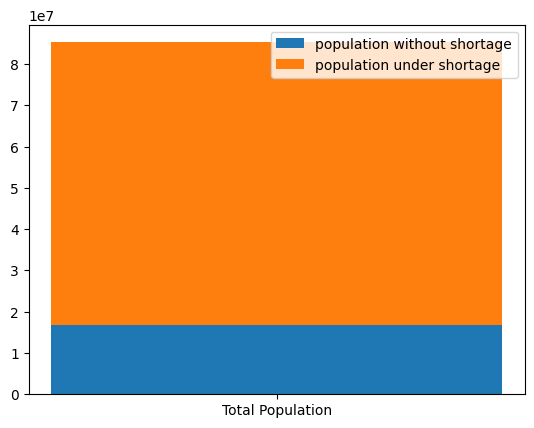

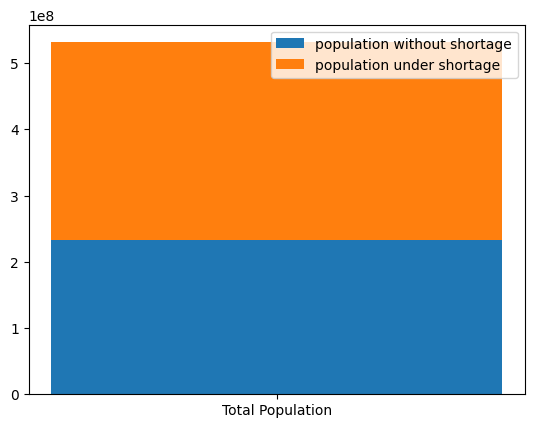

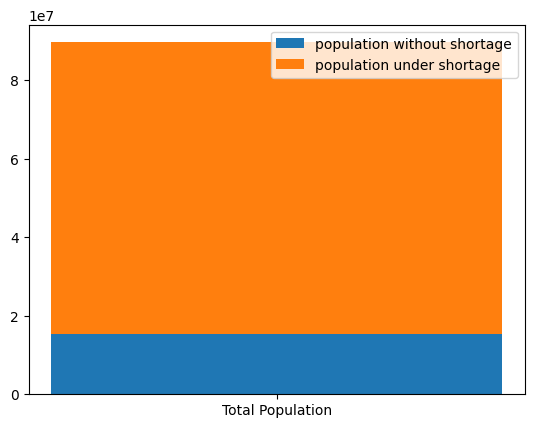

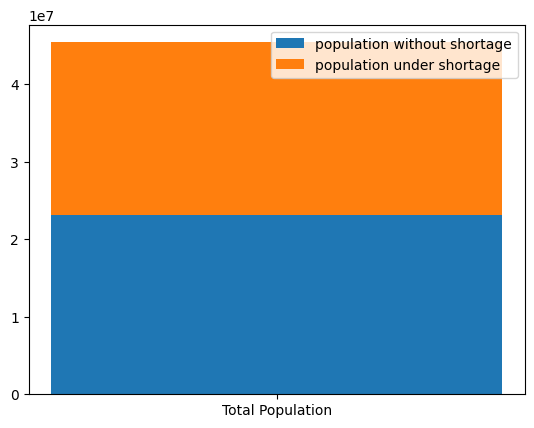

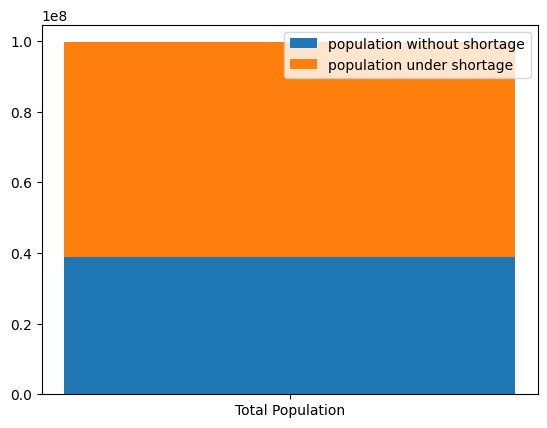

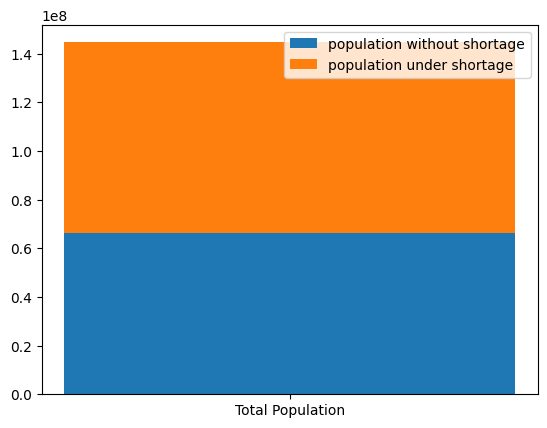

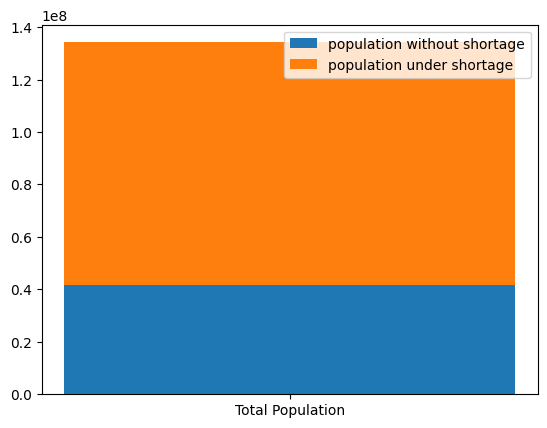

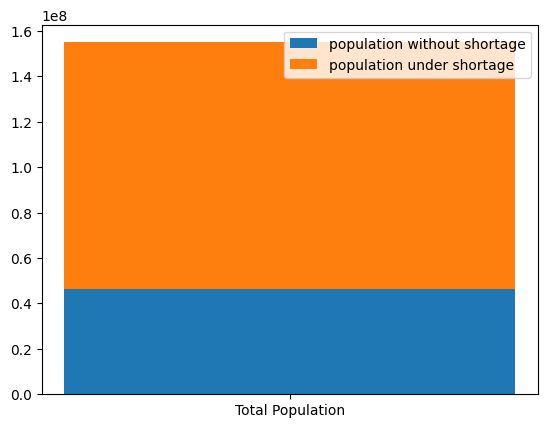

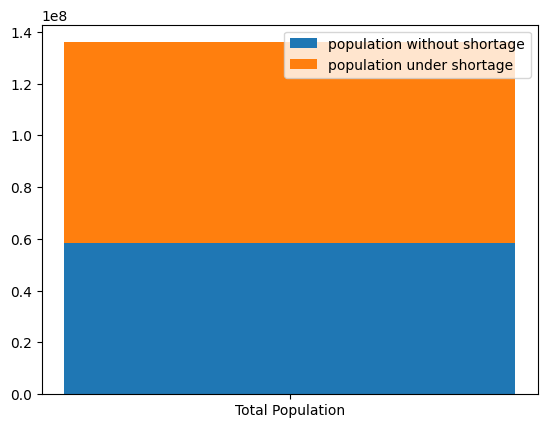

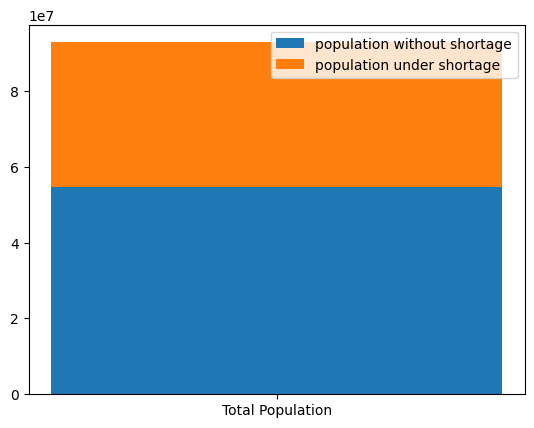

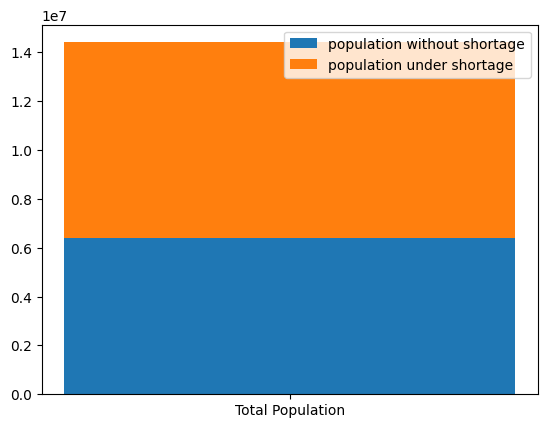

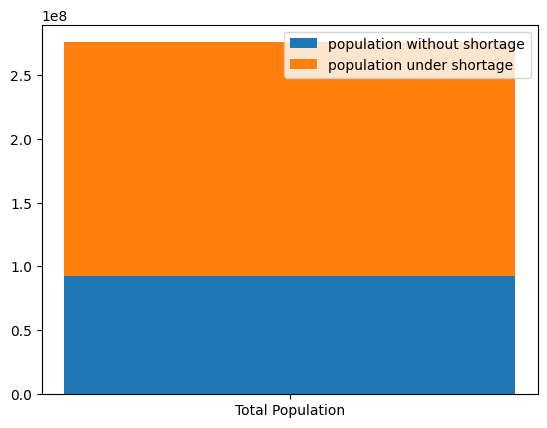

In [58]:
region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

def bar_plot(key):
    total = estimated_sorted[estimated_sorted['12region'] == key]['pop'].astype(float)
    stress = stressed_sorted[stressed_sorted['12region'] == key]['pop'].astype(float)
    potential = pot_sorted[pot_sorted['12region'] == key]['potential_pop'].astype(float)
    
    #x = ['Total Population', 'Potential Population]
    x = ['Total Population']
    
    #y1 = [total.sum() - stress.sum(), potential.sum()]
    #y2 = [stress.sum(), 0]
    
    y1 = [total.sum() - stress.sum()]
    y2 = [stress.sum()]
    
    plt.bar(x, y1, label='population without shortage')
    plt.bar(x, y2, bottom=y1, label='population under shortage')
    
    # ラベルの設定
    #plt.xlabel('Category')
    #plt.ylabel('Values')
    #plt.title('Stacked Bar Graph')
    plt.legend()
    
    # グラフの表示
    plt.show()

for key in region_lst:
    bar_plot(key)